In [1]:
import scorer
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
countries = [
"Australia",
"Germany",
"Japan",
"Netherlands",
"New Zealand",
"Poland",
"Russia",
"Singapore",
"Spain",
'Sweden',
'Ukraine',
'United States']

islands = [
    'Kiribati',
    'Maldives',
    'Marshall Islands',
    'Tuvalu'
]

timerange = range(30,90)

"""
Functions in order:
compatibility
acceptance
CHPI
viability
overall_evaluation
"""


'\nFunctions in order:\ncompatibility\nacceptance\nCHPI\nviability\noverall_evaluation\n'

In [ ]:
modelanswer = np.zeros((4,12,5,60))

In [ ]:
scorer.viability("Russia")

In [ ]:
for islandnum in range(0,4):
    for countrynum in range(12):
        for t in timerange:
            tau = t - 30
            modelanswer[islandnum][countrynum][0][tau] = scorer.compatibility(islands[islandnum], countries[countrynum])
            modelanswer[islandnum][countrynum][1][tau] = scorer.acceptance(countries[countrynum], t)
            modelanswer[islandnum][countrynum][2][tau] = scorer.CHPI(islands[islandnum], countries[countrynum], t, .5, .5)
            modelanswer[islandnum][countrynum][3][tau] = scorer.viability(countries[countrynum])
            modelanswer[islandnum][countrynum][4][tau] = scorer.overall_evaluation(islands[islandnum], countries[countrynum], t)
            

In [ ]:
culturalonly = np.zeros((4,12,5,60))
for islandnum in range(0,4):
    for countrynum in range(12):
        for t in timerange:
            tau = t - 30
            culturalonly[islandnum][countrynum][0][tau] = scorer.compatibility(islands[islandnum], countries[countrynum])
            culturalonly[islandnum][countrynum][1][tau] = scorer.acceptance(countries[countrynum], t)
            culturalonly[islandnum][countrynum][2][tau] = scorer.CHPI(islands[islandnum], countries[countrynum], t, .5, .5)
            culturalonly[islandnum][countrynum][3][tau] = scorer.viability(countries[countrynum])
            culturalonly[islandnum][countrynum][4][tau] = scorer.overall_evaluationculture(islands[islandnum], countries[countrynum], t)
            

In [ ]:
np.save("data\culturalemphasis.npy", culturalonly)

In [ ]:
logonly = np.zeros((4,12,5,60))
for islandnum in range(0,4):
    for countrynum in range(12):
        for t in timerange:
            tau = t - 30
            logonly[islandnum][countrynum][4][tau] = scorer.overall_evaluationlog(islands[islandnum], countries[countrynum], t)


In [ ]:
np.save("data\logisticsemphasis.npy", logonly)

Note that we now have a 4 dimensional tensor. (with dimensions as follows, [island][country][function][time].)

In [ ]:
modelanswer = np.load("data\overallmodel.npy")

Now Let's test this for a Russia's overall evaluation with regards to Maldives.

In [ ]:
Maldive_models = modelanswer[0][:][4][:]

In [ ]:
US = modelanswer[0][11][4][:]
Ukraine = modelanswer[0][10][4][:]

In [ ]:
plt.plot(timerange,  US)
plt.plot(timerange, Ukraine)

In [ ]:
plt.figure(dpi=150)
Kiribati = []
for i in range(len(countries)):
    plt.plot(timerange, modelanswer[0][i][4][:], label=countries[i])
    Kiribati.append((modelanswer[0][i][4][0], countries[i]))

plt.ylim([0,1])
plt.legend()
plt.show()

Kiribati.sort()
print(Kiribati)

In [ ]:
plt.figure(dpi=150)
maldives = []
for i in range(len(countries)):
    plt.plot(timerange, modelanswer[1][i][4][:], label=countries[i])
    maldives.append((modelanswer[1][i][4][0], countries[i]))

plt.ylim([0,1])
plt.legend()
plt.show()

maldives.sort()
print(maldives)


In [ ]:
plt.figure(dpi=150)
marshall = []
for i in range(len(countries)):
    plt.plot(timerange, modelanswer[2][i][4][:], label=countries[i])
    marshall.append(modelanswer[2][i][4][0])
plt.ylim([0,1])
plt.legend()
plt.show()



In [ ]:
plt.figure(dpi=150)
tuvalu = []
for i in range(len(countries)):
    plt.plot(timerange, modelanswer[3][i][4][:], label=countries[i])
    tuvalu.append(modelanswer[3][i][4][0])
plt.ylim([0,1])
plt.legend()
plt.show()

print(tuvalu)

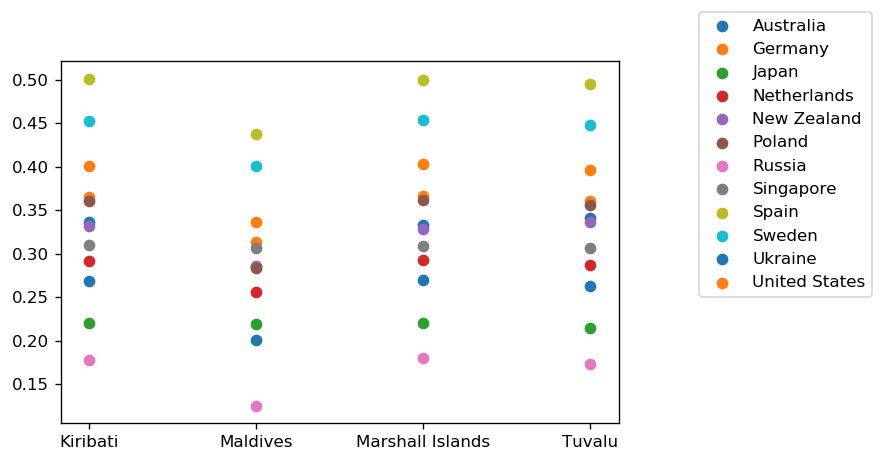

In [5]:
plt.figure(dpi=120)
for i in range(12):
    x = []
    for j in range(4):
        x.append(modelanswer[j][i][4][35])
    plt.scatter(islands, x, label = countries[i])

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
np.save("data\overallmodel.npy", modelanswer)

In [3]:
import scorer
mixed = np.zeros((4,12,5,60))
for islandnum in range(0,4):
    for countrynum in range(12):
        for t in timerange:
            tau = t - 30
            mixed[islandnum][countrynum][4][tau] = scorer.overall_evaluationmix(islands[islandnum], countries[countrynum], t)


In [3]:
modelanswer = np.load("data\overallmodel.npy")
culturalonly = np.load("data\culturalemphasis.npy")
logonly = np.load("data\logisticsemphasis.npy")
mixed = np.load("data\mixedmodel.npy")

In [4]:
np.save("data\mixedmodel.npy", mixed)

In [ ]:
plt.figure(dpi=150)
Kiribati = []
for i in range(len(countries)):
    plt.plot(timerange, culturalonly[0][i][4][:], label=countries[i])
    Kiribati.append((culturalonly[0][i][4][0], countries[i]))

plt.ylim([0,1])
plt.legend()
plt.show()

Kiribati.sort()
print(Kiribati)

In [ ]:
plt.figure(dpi=150)
Tuvalu = []
for i in range(len(countries)):
    plt.plot(timerange, culturalonly[1][i][4][:], label=countries[i])
    Tuvalu.append((culturalonly[0][i][4][0], countries[i]))

plt.ylim([0,1])
plt.legend()
plt.show()

Tuvalu.sort()
print(Tuvalu)

In [ ]:
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes current

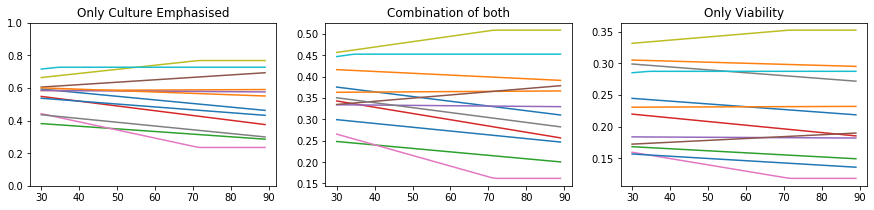

In [8]:
plt.figure(figsize = (15,3))

for i in range(len(countries)):
    b = plt.subplot(131)
    plt.plot(timerange, culturalonly[0][i][4][:], label=countries[i])
    plt.ylim([0,1])
    
    a = plt.subplot(132)
    plt.plot(timerange, modelanswer[0][i][4][:], label=countries[i])
    #plt.ylim([0,1])
    
    c = plt.subplot(133)
    plt.plot(timerange, mixed[0][i][4][:], label=countries[i])
    #plt.ylim([0,1])
    
a.set_title("Combination of both")
b.set_title("Only Culture Emphasised")
c.set_title("Only Viability")
plt.show()
